In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


# Question No.1

In [5]:
desc= data.describe()
desc

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [6]:
print('Zone wize mean:')
print('Zone A: ',desc.iloc[1,0])
print('Zone B: ',desc.iloc[1,1])
print('Zone C: ',desc.iloc[1,2])
print('Zone D: ',desc.iloc[1,3])

Zone wize mean:
Zone A:  1540493.1379310344
Zone B:  1755559.5862068965
Zone C:  1772871.0344827587
Zone D:  1842926.7586206896


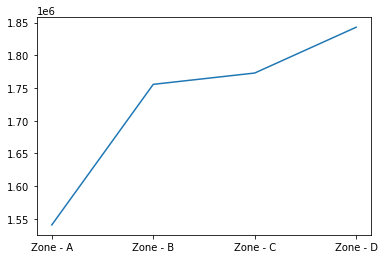

In [7]:
plt.plot(desc.columns,desc.loc['mean',:])
plt.show()

# Question No. 2

In [8]:
data['Total']=data[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].sum(axis=1)
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


# Question No. 3

To check whether amount of sales generated by all the zones are equal or different.

Null Hypothesis(H0): H0 states that all the four zones have the same amount of sales

Alternative Hypothesis(H1): H1 states that all the four zones have different amount of sales.

In [9]:
arr1= np.array(data['Zone - A'])
arr2= np.array(data['Zone - B'])
arr3= np.array(data['Zone - C'])
arr4= np.array(data['Zone - D'])
f, p= f_oneway(arr1,arr2,arr3,arr4)
print('F-statistic= ',f'and P-value= ',p)

F-statistic=  and P-value=  0.0011827601694503335


P value (0.00118) is less than level of significance(0.05), 
Null Hypothesis should be Rejected. 
All four zones have different amounts of sales.